In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
nodes = set()
for i in tqdm(range(0, 31)):
    day = i % 31 + 1
    month = i // 31 + 7
    file_name = '2020-' + str(month).zfill(2) + '-' + str(day).zfill(2) + '.gexf'
    file_path = f'contact_graphs/{file_name}'

    G = nx.read_gexf(file_path)
    nodes.update(G.nodes())

print(len(nodes))

100%|██████████| 31/31 [00:02<00:00, 11.76it/s]

24226


In [10]:
clustering_coefficients = []
average_path_lengths = []
average_node_degrees = []
average_betweenness_centralities = []

for i in tqdm(range(0, 62)):
    day = i % 31 + 1
    month = i // 31 + 7
    file_name = '2020-' + str(month).zfill(2) + '-' + str(day).zfill(2) + '.gexf'
    file_path = f'contact_graphs/{file_name}'

    G = nx.read_gexf(file_path)

    clustering_coefficients.append(nx.average_clustering(G))
    if nx.is_connected(G):
        average_path_lengths.append(nx.average_shortest_path_length(G))
    else:
        average_path_lengths.append(np.nan)
    average_node_degrees.append(np.mean([G.degree(n) for n in G.nodes()]))
    average_betweenness_centralities.append(np.mean(list(nx.betweenness_centrality(G).values())))

100%|██████████| 62/62 [16:39<00:00, 16.13s/it]


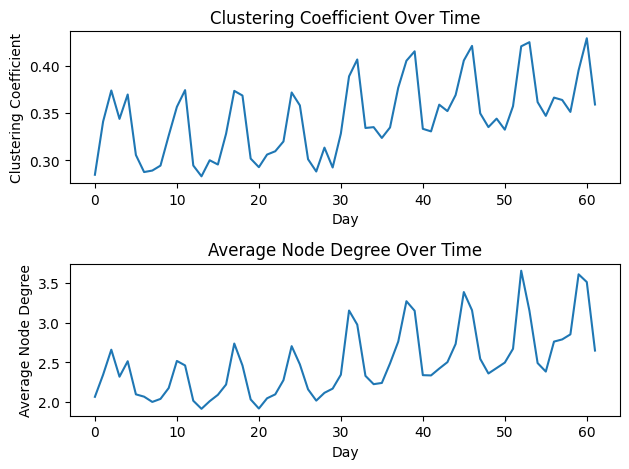

In [19]:
# figure, axis = plt.subplots(2, 2)

# axis[0, 0].plot(clustering_coefficients, label='Clustering Coefficient Over Time')
# axis[0, 0].set_title("Clustering Coefficient Over Time")
# axis[0, 0].set_ylabel("Clustering Coefficient")
# axis[0, 0].set_xlabel("Day")
# # axis[0, 0].set_ylim([0, 1000])

# axis[0, 1].plot(average_node_degrees, label='Average Node Degree Over Time')
# axis[0, 1].set_title("Average Node Degree Over Time")
# axis[0, 1].set_ylabel("Average Node Degree")
# axis[0, 1].set_xlabel("Day")
# # axis[0, 1].set_ylim([0, 1000])

# # axis[1, 0].plot(average_path_lengths, label='Average Path Length Over Time')
# # axis[1, 0].set_title("Average Path Length Over Time")
# # axis[1, 0].set_ylabel("Average Path Length")
# # axis[1, 0].set_xlabel("Day")
# # # axis[1, 0].set_ylim([0, 1000])

# axis[1, 1].plot(average_betweenness_centralities, label='Average Betweenness Centrality Over Time')
# axis[1, 1].set_title("Average Betweenness Centrality Over Time")
# axis[1, 1].set_ylabel("Average Betweenness Centrality")
# axis[1, 1].set_xlabel("Day")
# # axis[1, 1].set_ylim([0, 1000])

# plt.show()

fig = plt.figure()

# Define the size of each subplot in the grid
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # First row, spans both columns
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=2)              # Second row, first column
# ax3 = plt.subplot2grid((2, 2), (1, 1))              # Second row, second column

ax1.plot(clustering_coefficients, label='Clustering Coefficient Over Time')
ax1.set_title("Clustering Coefficient Over Time")
ax1.set_ylabel("Clustering Coefficient")
ax1.set_xlabel("Day")

ax2.plot(average_node_degrees, label='Average Node Degree Over Time')
ax2.set_title("Average Node Degree Over Time")
ax2.set_ylabel("Average Node Degree")
ax2.set_xlabel("Day")

# ax3.plot(average_betweenness_centralities, label='Average Betweenness Centrality Over Time')
# ax3.set_title("Average Betweenness Centrality Over Time")
# ax3.set_ylabel("Average Betweenness Centrality")
# ax3.set_xlabel("Day")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# plt.figure()

# plt.plot(clustering_coefficients, label='Clustering Coefficient Over Time')
# plt.plot(average_node_degrees, label='Average Node Degree Over Time')
# plt.plot(average_path_lengths, label='Average Path Length Over Time')
# plt.plot(average_betweenness_centralities, label='Average Betweenness Centrality Over Time')

# #label your plot lines 
# plt.legend()
# plt.grid()
# plt.title("Day")
# plt.xlabel("Day")
# plt.ylabel("Stats")
# plt.show()


In [23]:
print(max(*clustering_coefficients))
print(min(*clustering_coefficients))
print(max(*average_node_degrees))
print(min(*average_node_degrees))


0.4289057914539593
0.2829069789475679
3.65144596651446
1.9140469558296855
